# Project Name : - Forest Fire Prediction System


## 1) Problem statement .

* This dataset comprises of Algerian Forest Fire Dataset  taken from UCI . 
* Link of the dataset is as follows :- https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++ .
* This Model Predicts using Logistic Regression Algorithm that whether there will be a fire or not in the Algerian Forest on the basis of various given circumstances in the data .
 



## 2) Data Collection.
* This dataset includes 244 instances that regroup a data of 2 regions of Algeria,namely the Brjajia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria .
* 122 instances for each region .
* The Period is from June 2012 to September 2012.The Dataset includes 11 attributes and 1 output attribute i.e. Classes
* The data consists of 14 column and 246 rows.

### 2.1 Import Data and Required Packages

**Importing Necessary Libraries**

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: C:\Users\aadij\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/aadij/OneDrive/Desktop/Algerian_forest_fires_dataset_UPDATE.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from warnings import filterwarnings
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
filterwarnings('ignore')
%matplotlib inline

**Loading the Algerian Forest Fire Dataset**

In [4]:
df=pd.read_csv(r"C:/Users/aadij/OneDrive/Desktop/Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


**Attribute Information :-**

**Period Covered**
* 1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather data observations**
* 2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
* 3. RH : Relative Humidity in %: 21 to 90
* 4. Ws :Wind speed in km/h: 6 to 29
* 5. Rain: total day in mm: 0 to 16.8

**FWI Components**
* 6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
* 7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
* 8. Drought Code (DC) index from the FWI system: 7 to 220.4
* 9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
* 10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
* 11. Fire Weather Index (FWI) Index: 0 to 31.1
* 12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€    

In [6]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [7]:
df.shape

(246, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [9]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [10]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [11]:
df.iloc[121:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


# **2.2 Data Cleaning**

**Dropping row no 122 specifying region name  & 123 respecifying the header**

In [12]:
df.drop([122,123],inplace=True)

**Resetting the index and dropping the index column**

In [13]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

**Creating a new column called Region reprenting [0:- Bejaia and 1- Sidi Bel-abbes]**

In [14]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

**Checking the Column Headers**

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

**Removing unnecessary space in column headers using str.strip()**

In [16]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

**Dropping rows with null values**

In [17]:
df.dropna(inplace=True)

**Converting the necessary column dataye to int**

In [18]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

In [19]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype(int)

In [20]:
df.dtypes

day             int32
month           int32
year            int32
Temperature     int32
RH              int32
Ws              int32
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

**Values in df[Classes] has unnecessary spaces that are removed by str.strip()**

In [21]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [22]:
df.Classes=df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

**Converting the Necessary Column Datatype to Float**

In [23]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [24]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [25]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

**Dropping the year column as the data is for the same year**

In [26]:
df1=df.drop(['year'],axis=1)

**DataFrame Description**

In [27]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


# **3. Exploratory Data Analysis**

**Encoding not fire as 0 and Fire as 1**

In [28]:
set(df1.Classes)

{'fire', 'not fire'}

In [29]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Classes'. 
df1 ['Classes']= label_encoder.fit_transform(df1 ['Classes']) 
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [30]:
set(df1.Classes)

{0, 1}

In [31]:
df1.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,-0.202840,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,-0.024004,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.735197,0.263197


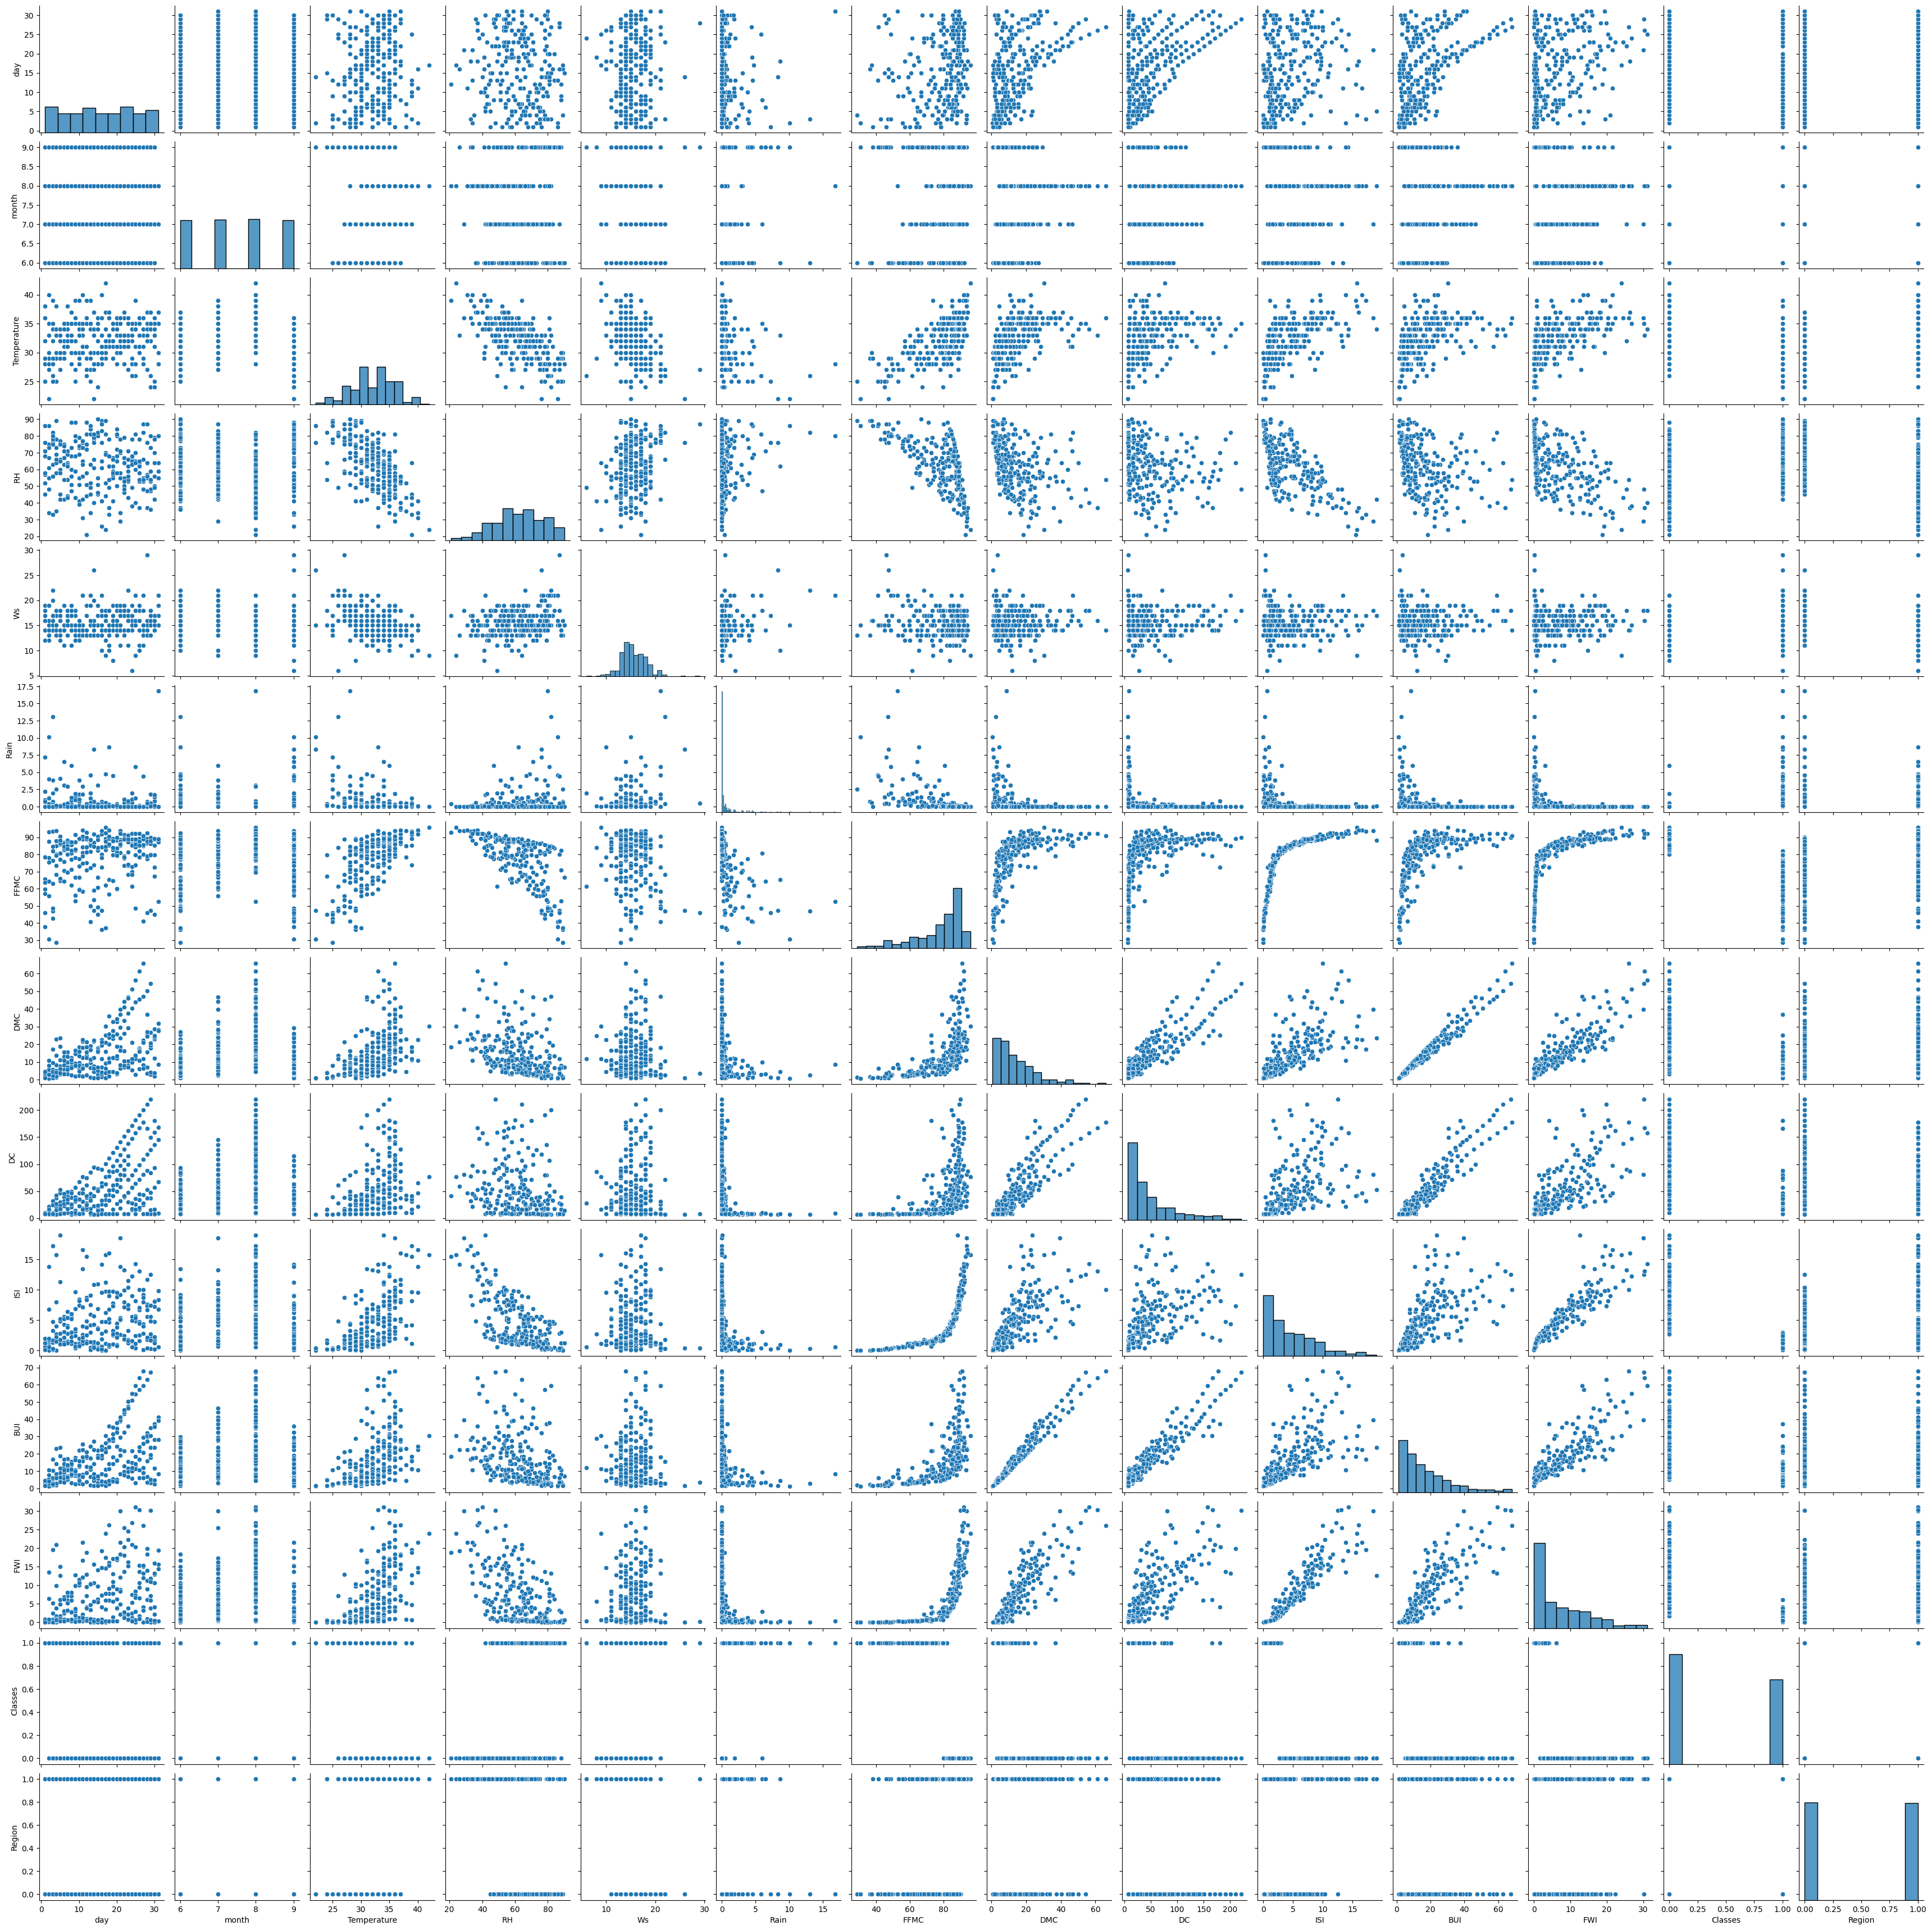

In [32]:
sns.pairplot(df1)

<Axes: >

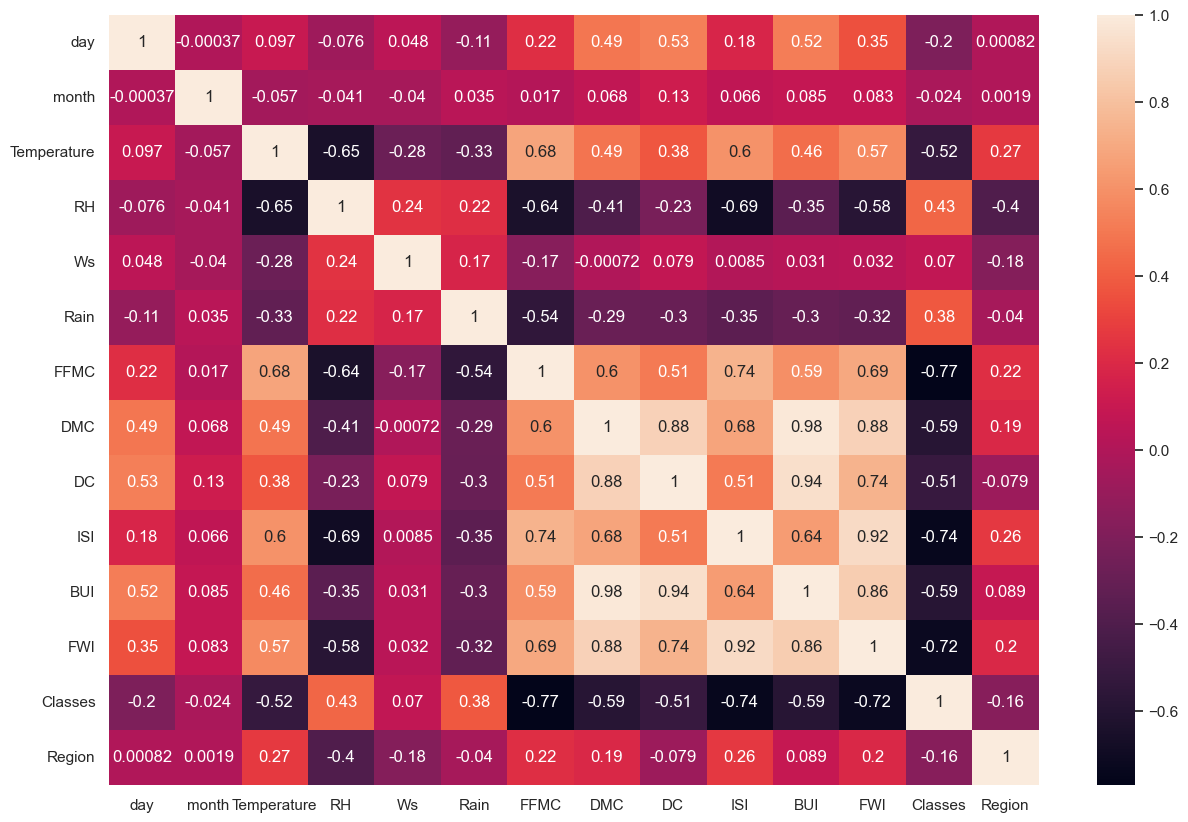

In [33]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df1.corr(),annot=True)

**Report** 
* RH is negatively corelated with Temperature, FFMC and ISI
* Rain is negatively correlated with Temperature and FFMC,DMC, ISI and BUI

**Histogram**

-**A histogram is basically used to represent data provided in a form of sme groups**

array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'Ws'}>, <Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>, <Axes: title={'center': 'FWI'}>],
       [<Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>, <Axes: >, <Axes: >]],
      dtype=object)

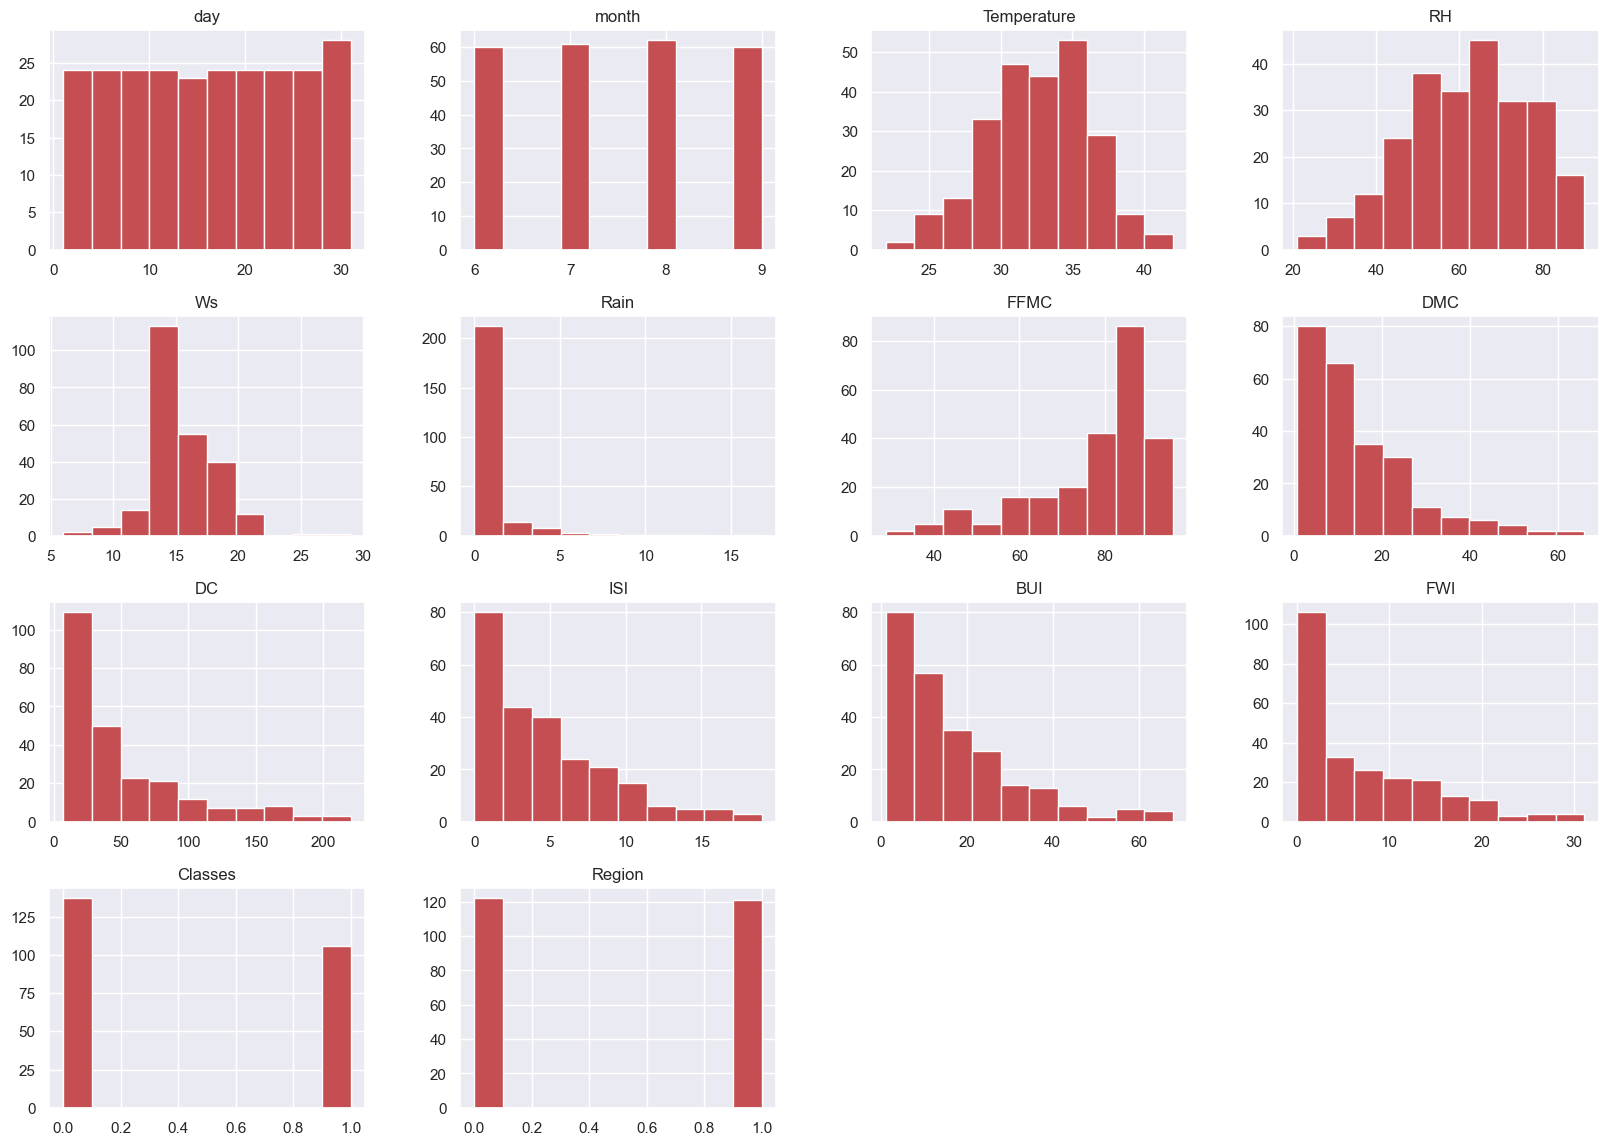

In [34]:
df1.hist(figsize=(20,14),color='r')

**Percentage for Pie Chart**

In [35]:
percentage=df.Classes.value_counts(normalize=True)*100
percentage

Classes
fire        56.378601
not fire    43.621399
Name: proportion, dtype: float64

**Plotting Pie chart**

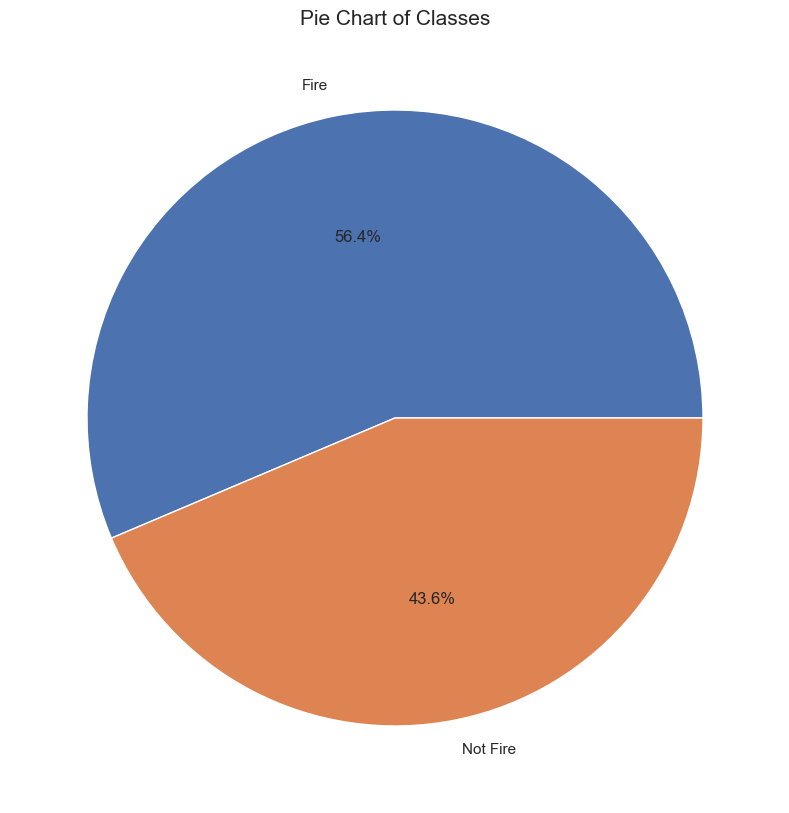

In [36]:
classes_labels=['Fire','Not Fire']
plt.figure(figsize=(15,10))
plt.pie(percentage,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

# Model Building Using Logistic Regression

In [37]:
df1

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


In [38]:
X = df1[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI','Region']]
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [39]:
y=df1['Classes']
y

0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    1
241    1
242    1
243    1
Name: Classes, Length: 243, dtype: int32

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.35)

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm 
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [42]:
# Instantiating the SVM algorithm 
model1=svm.SVC()

# Fitting the model 
model1.fit (X_train, y_train)

# Predicting the test variables
y_pred = model1.predict(X_test)

# Getting the score 
model1.score (X_test, y_test)

0.9069767441860465

In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred})

Training Score: 1.0
Testing Score: 0.9883720930232558


# **Feature Scaling**

In [44]:
def Feature_Scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train_after_Standardisation = scaler.fit_transform(X_train)
    X_test_after_Standardisation = scaler.transform(X_test)
    return X_train_after_Standardisation, X_test_after_Standardisation

In [45]:
X_train_after_Standardisation,X_test_after_Standardisation=Feature_Scaling(X_train, X_test)

In [46]:
logistic_regression=LogisticRegression()

In [47]:
logistic_regression.fit(X_train_after_Standardisation,y_train)

LogisticRegression()

In [48]:
print('Intercept is :',logistic_regression.intercept_)
print('Coefficient is :',logistic_regression.coef_)

Intercept is : [-1.2743898]
Coefficient is : [[-0.10745791 -0.11350982  0.04019375 -0.24388677 -2.36919088  0.00355895
  -0.33783241 -2.12212991 -0.12665593 -1.69877567 -0.1699233 ]]


In [49]:
print("Training Score:",logistic_regression.score(X_train_after_Standardisation, y_train))
print("Test Score:",logistic_regression.score(X_test_after_Standardisation,y_test))

Training Score: 0.9808917197452229
Test Score: 0.9534883720930233


In [50]:
Logistic_Regression_Prediction=logistic_regression.predict(X_test_after_Standardisation)

In [51]:
Actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': Logistic_Regression_Prediction})    
Actual_predicted['Report']=abs(Actual_predicted['Actual']-Actual_predicted['Predicted'])
Actual_predicted['Classes']= np.where(Actual_predicted['Report']== 0,'Matched','Unmatched')
Actual_predicted_group_df=Actual_predicted.groupby(['Classes']).agg({'Classes':['count']})
Actual_predicted_group_df.reset_index()

Classes      
             count
0    Matched    82
1  Unmatched     4

# Evaluation of a Classification Model

In machine learning, once we have a result of the classification problem, how do we measure how accurate our classification is?
For a  regression problem, we have different metrics like R Squared score, Mean Squared Error etc. what are the metrics to measure the credibility of a classification model?

Metrics
In a regression problem, the accuracy is generally measured in terms of the difference in the actual values and the predicted values.
In a classification problem, the credibility of the model is measured using the confusion matrix generated, i.e., how accurately the true positives and true negatives were predicted.
The different metrics used for this purpose are:
- Accuracy
- Recall
- Precision
- F1 Score
- Specifity
- AUC( Area Under the Curve)
- RUC(Receiver Operator Characteristic)

# Confusion Matrix
A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.

In [52]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,Logistic_Regression_Prediction)
conf_mat

array([[50,  2],
       [ 2, 32]], dtype=int64)

**Plotting Confusion Matrix**

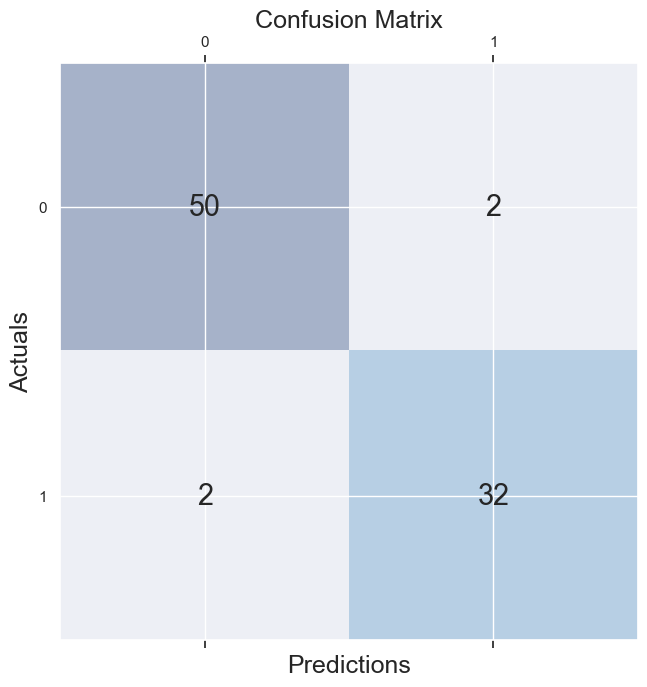

In [53]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=Logistic_Regression_Prediction)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Splitting the Confusion Matrix**

In [54]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

# **Accuracy**



The mathematical formula is :

   __Accuracy__= $ \frac{ (TP+TN)}{(TP+TN+FP+FN)} $
    
Or, it can be said that it’s defined as the total number of correct classifications divided by the total number of classifications. 

In [55]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9534883720930233

**Our Model has an  accuracy of 96%**

# **Precision**

Precision is a measure of amongst all the positive predictions, how many of them were actually positive. Mathematically,

Precision=$ \frac {TP}{(TP+FP)} $


In [56]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9615384615384616

**Our model has an Precision of 95%**

# **Recall or Sensitivity**

The mathematical formula is:

   __Recall__= $ \frac{ TP}{(TP+FN)} $

Or, as the name suggests, it is a measure of: from the total number of positive results how many positives were correctly predicted by the model.

It shows how relevant the model is, in terms of positive results only.


In [57]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9615384615384616

**Our Model has an  Recall of 98%**



As observed from the graph, with an increase in the Recall, there is a drop in Precision of the model.

So the question is - what to go for? Precision or Recall?

Well, the answer is: it depends on the business requirement.

For example, if you are predicting fire, you need a 100 % recall. But suppose you are predicting whether a person is innocent or not, you need 100% precision.

Can we maximise both at the same time? No

So, there is a need for a better metric then?

Yes. And it’s called an _F1 Score_

# **F1 Score**

### F1 Score

From the previous examples, it is clear that we need a metric that considers both Precision and Recall for evaluating a model. One such metric is the F1 score.

F1 score is defined as the harmonic mean of Precision and Recall. 

The mathematical formula is:
        F1 score= $ \frac {2*((Precision*Recall)}{(Precision+Recall))} $

In [58]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9615384615384616

**Our Model has an F1 Score of 96%**

# ROC & AUC

#### What is the significance of Roc curve and AUC?

In real life, we create various models using different algorithms that we can use for classification purpose. We use AUC to determine which model is the best one to use for a given dataset. 
Suppose we have created Logistic regression, SVM as well as a clustering model for classification purpose. We will calculate AUC for all the models seperately. The model with highest AUC value will be the best model to use.

# AUC(Area Under Curve)

![AUC.PNG](attachment:AUC.PNG)

* It helps us to choose the best model amongst the models for which we have plotted the ROC curves
* The best model is the one which encompasses the maximum area under it.
* In the adjacent diagram, amongst the two curves, the model that resulted in the red one should be chosen as it clearly covers more area than the blue one

In [59]:
auc = roc_auc_score(y_test, Logistic_Regression_Prediction)
auc

0.9513574660633485

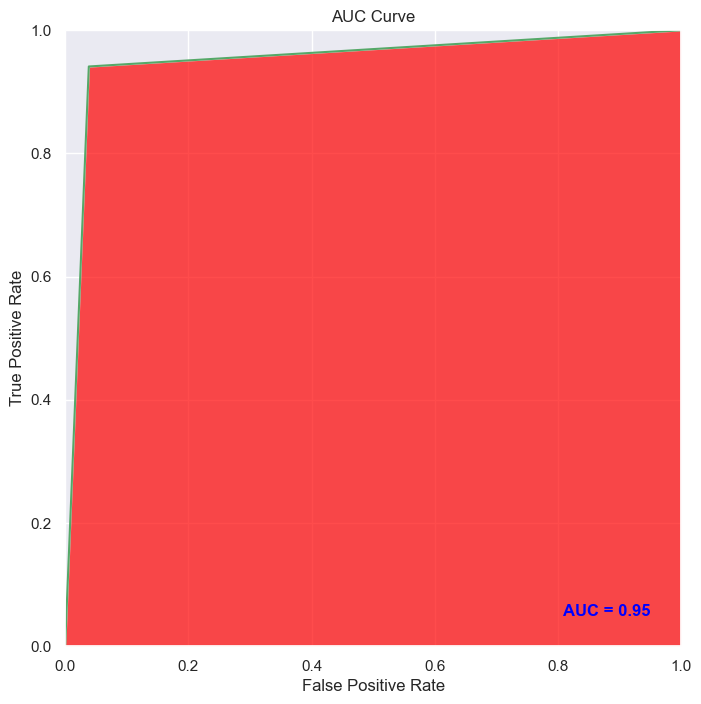

In [60]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, Logistic_Regression_Prediction)
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='red', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# ROC(Receiver Operator Characteristic)

We know that the classification algorithms work on the concept of probability of occurrence of the possible outcomes. A probability value lies between 0 and 1. Zero means that there is no probability of occurrence and one means that the occurrence is certain.

But while working with real-time data, it has been observed that we seldom get a perfect 0 or 1 value. Instead of that, we get different decimal values lying between 0 and 1. Now the question is if we are not getting binary probability values how are we actually determining the class in our classification problem?

There comes the concept of Threshold. A threshold is set, any probability value below the threshold is a negative outcome, and anything more than the threshold is a favourable or the positive outcome. For Example, if the threshold is 0.5, any probability value below 0.5 means a negative or an unfavourable outcome and any value above 0.5 indicates a positive or favourable outcome. 

Now, the question is, what should be an ideal threshold?



* The horizontal lines represent the various values of thresholds ranging from 0 to 1.
* Let’s suppose our classification problem was to identify the obese people from the given data.
* The green markers represent obese people and the red markers represent the non-obese people.
* Our confusion matrix will depend on the value of the threshold chosen by us.
* For Example, if 0.25 is the threshold then
        TP(actually obese)=3
        TN(Not obese)=2
        FP(Not obese but predicted obese)=2(the two red squares above the 0.25 line)
        FN(Obese but predicted as not obese )=1(Green circle below 0.25line  )



* Mathematically, it represents the various confusion matrices for various thresholds. Each black dot is one confusion matrix.
* The green dotted line represents the scenario when the true positive rate equals the false positive rate.
* As evident from the curve, as we move from the rightmost dot towards left, after a certain threshold, the false positive rate decreases.
* After some time, the false positive rate becomes zero.
* The point encircled in green is the best point as it predicts all the values correctly and keeps the False positive as a minimum.
* But that is not a rule of thumb. Based on the requirement, we need to select the point of a threshold.
* The ROC curve answers our question of which threshold to choose.


In [61]:
fpr, tpr, thresholds = roc_curve(y_test, Logistic_Regression_Prediction)

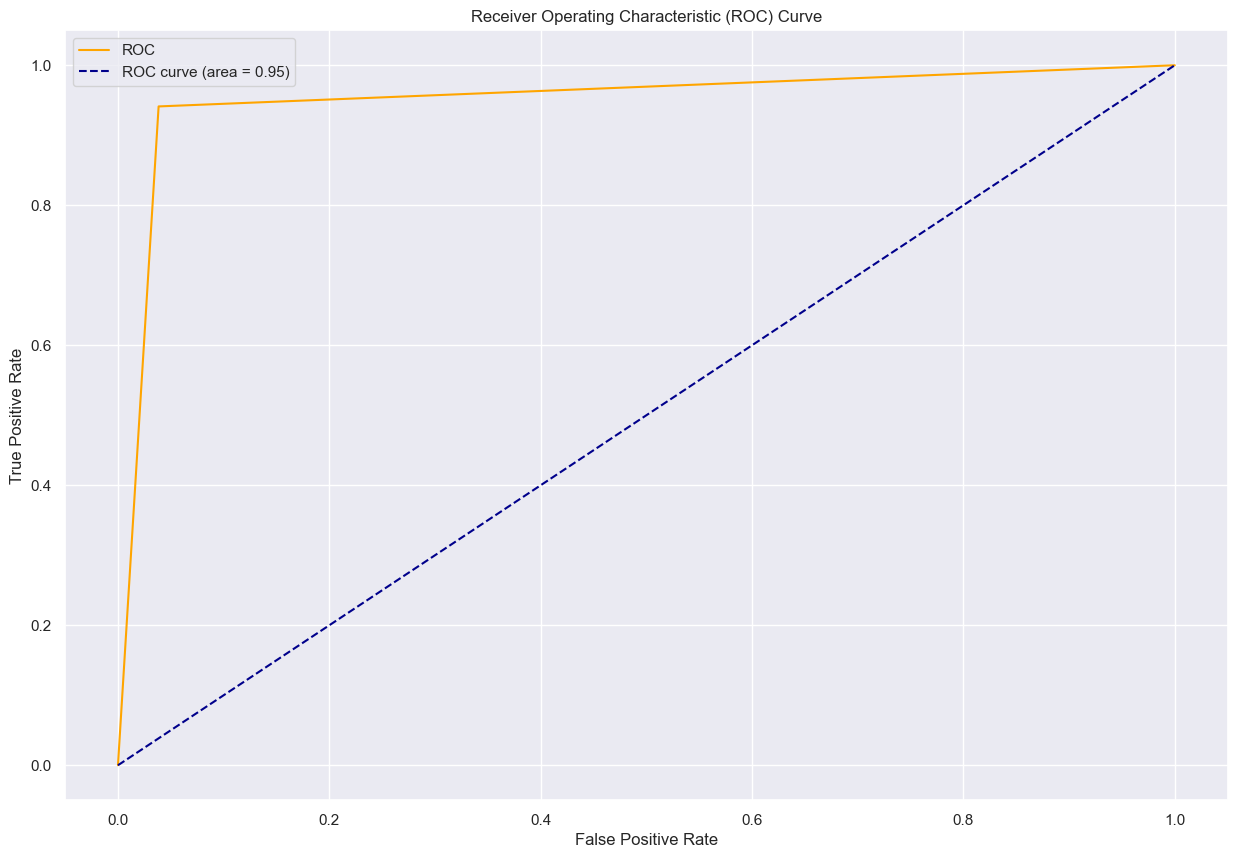

In [62]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()